In [ ]:
!pip install utils

In [ ]:
import cv2
import PIL
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import tensorflow as tf
from PIL import Image
import numpy as np
import os
import json

In [ ]:
clt = KMeans(n_clusters=2)

In [ ]:
clt_1

NameError: ignored

In [ ]:
def palette(clusters):
    width=300
    palette = np.zeros((50, width, 3), np.uint8)
    steps = width/clusters.cluster_centers_.shape[0]
    for idx, centers in enumerate(clusters.cluster_centers_): 
        palette[:, int(idx*steps):(int((idx+1)*steps)), :] = centers
    return palette

In [ ]:
def img_compare(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[0].axis('off') #hide the axis
    ax[1].axis('off')
    f.tight_layout()
    plt.show()

In [ ]:
def closest_color(color,colors):
    colors = np.array(colors)
    color = np.array(color)
    distances = np.sqrt(np.sum((colors-color)**2,axis=1))
    index_of_smallest = np.where(distances==np.amin(distances))
    smallest_distance = colors[index_of_smallest]
    return smallest_distance

In [ ]:
folders = ['glass/', 'plastic/', 'paper/','can/']

In [ ]:
can = os.listdir('/content/drive/MyDrive/recyclable_materials/train/' + folders[3] )

In [ ]:
glass = os.listdir('/content/drive/MyDrive/recyclable_materials/train/' + folders[0] )

In [ ]:
plastic = os.listdir('/content/drive/MyDrive/recyclable_materials/train/' + folders[1])

In [ ]:
paper = os.listdir('/content/drive/MyDrive/recyclable_materials/train/' + folders[2])

In [ ]:
files = [glass, plastic, paper, can]

In [ ]:
for i in range(4):
    for j in files[i]:
        try : 
            with open('/content/drive/MyDrive/recyclable_materials/labeling/' + folders[i] + j + '.json', 'r') as readfile:
                json.load(readfile)
        except:
            img = cv2.imread('/content/drive/MyDrive/recyclable_materials/train/' + folders[i] + j,flags=-1)
            if img.size > 10400000:
                continue
            x,y,_ = img.shape 
            res = img.reshape(-1, 3)  
            clt_1 = clt.fit(res)
            colors = clt_1.cluster_centers_
            rres = []
            for fix in res:
                if (closest_color(fix, colors) == colors[1]).all():
                    rres.append(1)
                else :
                    rres.append(0)
            rres = np.array(rres).reshape(x,y)
            color0 = np.where(rres==0)
            color1 = np.where(rres==1)
            color0_count = 0
            color1_count = 0
            if color0[0].min() == 0 :
                color0_count += 1
            if color0[0].max() == x-1 :
                color0_count += 1
            if color0[1].min() == 0 :
                color0_count += 1
            if color0[1].max() == y-1 :
                color0_count += 1

            if color1[0].min() == 0 :
                color1_count += 1
            if color1[0].max() == x-1 :
                color1_count += 1
            if color1[1].min() == 0 :
                color1_count += 1
            if color1[1].max() == y-1 :
                color1_count += 1

            label = {'size' : [x,y]}
            if color0_count == color1_count:
                label['out_line'] = np.nan
            elif color0_count > color1_count:
                label['out_line'] = {
                        'x0' : round(color1[0].min() - (color1[0].min() / 5 )),
                        'x1' : color1[0].max() + ((x - color1[0].max()) / 5),
                        'y0' : round(color1[1].min() - (color1[1].min() / 5 )),
                        'y1' : color1[1].max() + ((y - color1[1].max()) / 5),
                        }
            elif color0_count < color1_count:
                label['out_line'] = {
                        'x0' : round(color0[0].min() - (color0[0].min() / 5 )),
                        'x1' : color0[0].max() + ((x - color0[0].max()) / 5),
                        'y0' : round(color0[1].min() - (color0[1].min() / 5 )),
                        'y1' : color0[1].max() + ((y - color0[1].max()) / 5),
                        }
            label = json.dumps(label)
            with open('/content/drive/MyDrive/recyclable_materials/labeling/' + folders[i] + j + '.json', 'w') as to_json:
                json.dump(label, to_json)

In [ ]:
for i in range(4):
    for j in files[i]:
        try : 
            with open('/content/drive/MyDrive/recyclable_materials/labeling/' + folders[i] + j + '.json', 'r') as readfile:
                json.load(readfile)
        except:
            img = cv2.imread('/content/drive/MyDrive/recyclable_materials/train/' + folders[i] + j,flags=-1)
            x,y,_ = img.shape 
            res = img.reshape(-1, 3)  
            clt_1 = clt.fit(res)
            colors = clt_1.cluster_centers_
            rres = []
            for fix in res:
                if (closest_color(fix, colors) == colors[1]).all():
                    rres.append(1)
                else :
                    rres.append(0)
            rres = np.array(rres).reshape(x,y)
            color0 = np.where(rres==0)
            color1 = np.where(rres==1)
            color0_count = 0
            color1_count = 0
            if color0[0].min() == 0 :
                color0_count += 1
            if color0[0].max() == x-1 :
                color0_count += 1
            if color0[1].min() == 0 :
                color0_count += 1
            if color0[1].max() == y-1 :
                color0_count += 1

            if color1[0].min() == 0 :
                color1_count += 1
            if color1[0].max() == x-1 :
                color1_count += 1
            if color1[1].min() == 0 :
                color1_count += 1
            if color1[1].max() == y-1 :
                color1_count += 1

            label = {'size' : [x,y]}
            if color0_count == color1_count:
                label['out_line'] = np.nan
            elif color0_count > color1_count:
                label['out_line'] = {
                        'x0' : round(color1[0].min() - (color1[0].min() / 5 )),
                        'x1' : color1[0].max() + ((x - color1[0].max()) / 5),
                        'y0' : round(color1[1].min() - (color1[1].min() / 5 )),
                        'y1' : color1[1].max() + ((y - color1[1].max()) / 5),
                        }
            elif color0_count < color1_count:
                label['out_line'] = {
                        'x0' : round(color0[0].min() - (color0[0].min() / 5 )),
                        'x1' : color0[0].max() + ((x - color0[0].max()) / 5),
                        'y0' : round(color0[1].min() - (color0[1].min() / 5 )),
                        'y1' : color0[1].max() + ((y - color0[1].max()) / 5),
                        }
            label = json.dumps(label)
            with open('/content/drive/MyDrive/recyclable_materials/labeling/' + folders[i] + j + '.json', 'w') as to_json:
                json.dump(label, to_json)

In [ ]:
img = cv2.imread('/content/drive/MyDrive/recyclable_materials/train/' + folders[i] + 'bandicam 2019-11-04 21-40-10-319.jpg',flags=-1)

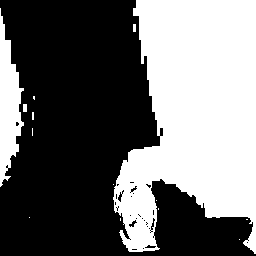

In [ ]:
Image.fromarray((rres*255).astype('u1'))

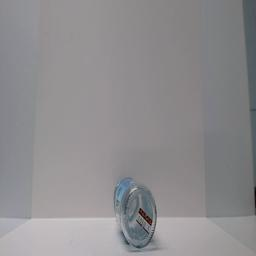

In [ ]:
Image.fromarray(img)

In [ ]:
label = eval(label)

TypeError: ignored

In [ ]:
board = np.zeros(label['size'])

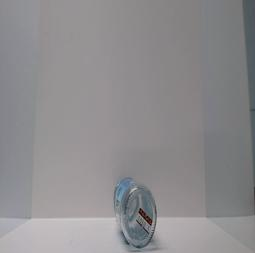

In [ ]:
Image.fromarray(img[0:253, 0: 255])

In [ ]:
img.shape

(256, 256, 3)

In [ ]:
label['out_line']

{'x0': 0, 'x1': 253.6, 'y0': 0, 'y1': 255.2}

{'out_line': {'x0': 370, 'x1': 719.2, 'y0': 0, 'y1': 1227.2},
 'size': [720, 1280]}

In [ ]:
with open('/content/drive/MyDrive/deeplearning_file/recyclable_materials/labeling/' + folders[i] + 'test' + '.json', 'w') as outfile:

SyntaxError: ignored

FileNotFoundError: ignored

In [ ]:
_

'{\n    "size": [\n        960,\n        720\n    ],\n    "out_line": {\n        "x0": 189,\n        "x1": 871.2,\n        "y0": 53,\n        "y1": 666.4\n    }\n}'

In [ ]:
colors

array([[178.01911998, 186.49006752, 190.32665726],
       [ 92.38190295,  70.08183725,  52.64064889]])

In [ ]:
Image.fromarray((rres * 255).astype('u1'))

In [ ]:
Image.fromarray((img * rres).astype('u1'))

ValueError: ignored

In [ ]:
Image.fromarray(img)

In [ ]:
img.dtype

dtype('uint8')

In [ ]:
res = img.reshape(-1,3)

In [ ]:
rres = []
for _ in res :
    rres.append(list(closest_color(_, a)[0]))

In [ ]:
rres = np.array(rres).reshape(img.shape)

In [ ]:
rres.shape

(480, 640, 3)

In [ ]:
clt_1 = clt.fit(img.reshape(-1, 3))
img_compare(img, palette(clt_1))

In [ ]:
folders = ['can/', 'glass/', 'plastic/', 'paper/']

In [ ]:
can = os.listdir('/content/drive/MyDrive/deeplearning_file/recyclable_materials/test/' + folders[0] )

In [ ]:
glass = os.listdir('/content/drive/MyDrive/deeplearning_file/recyclable_materials/test/' + folders[1] )

In [ ]:
plastic = os.listdir('/content/drive/MyDrive/deeplearning_file/recyclable_materials/test/' + folders[2] )

In [ ]:
paper = os.listdir('/content/drive/MyDrive/deeplearning_file/recyclable_materials/test/' + folders[3] )

In [ ]:
files = [can, glass, plastic, paper]

In [ ]:
a= clt_1.cluster_centers_

In [ ]:
closest_color(,a)

In [ ]:
img.shape

(480, 640, 3)

In [ ]:
# import the necessary packages
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import argparse
import utils
import cv2
# construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required = True, help = '/content/drive/MyDrive/deeplearning_file/recyclable_materials/test/' + folders[0] + can[0])
ap.add_argument("-c", "--clusters", required = True, type = int,
	help = "# of clusters")
args = vars(ap.parse_args())
# load the image and convert it from BGR to RGB so that
# we can dispaly it with matplotlib
image = cv2.imread(args["image"])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# show our image
plt.figure()
plt.axis("off")
plt.imshow(image)

usage: ipykernel_launcher.py [-h] -i IMAGE -c CLUSTERS
ipykernel_launcher.py: error: the following arguments are required: -i/--image, -c/--clusters


SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
import os

In [ ]:
im = Image.open('/content/drive/MyDrive/deeplearning_file/recyclable_materials/test/' + folders[2]  + plastic[500])
im = im.resize((256,256))

IndexError: ignored

In [ ]:
im.save('/content/drive/MyDrive/deeplearning_file/recyclable_materials/train256/' +folders[0] + files[0][0],'JPEG')

In [ ]:
for i in range(len(folders)):
    for file in files[i]:
        im = Image.open('/content/drive/MyDrive/deeplearning_file/recyclable_materials/test/' + folders[i]  + file)
        im = im.resize((256,256))
        im.save('/content/drive/MyDrive/deeplearning_file/recyclable_materials/test256/' +folders[i] + file,'JPEG')

In [ ]:
for i in range(len(folders)):
    for file in files[i]:
        im = Image.open('/content/drive/MyDrive/deeplearning_file/recyclable_materials/test/' + folders[i]  + file)
        im = im.resize((512,512))
        im.save('/content/drive/MyDrive/deeplearning_file/recyclable_materials/test512/' +folders[i] + file,'JPEG')

In [ ]:
for i in range(len(folders)):
    for file in files[i]:
        im = Image.open('/content/drive/MyDrive/deeplearning_file/recyclable_materials/test/' + folders[i]  + file)
        im = im.resize((128,128))
        im.save('/content/drive/MyDrive/deeplearning_file/recyclable_materials/test128/' +folders[i] + file,'JPEG')

In [ ]:
src = cv2.imread('/content/drive/MyDrive/deeplearning_file/recyclable_materials/train/' + folders[2]  + plastic[50])

ValueError: ignored

In [ ]:
src.resize((255, 255))

ValueError: ignored

In [ ]:
dst = cv2.inRange(src, (100, 100, 100), (245, 245, 245))

In [ ]:
Image.fromarray(dst.astype(np.uint8))

In [ ]:
Image.fromarray(src.astype(np.uint8))

In [ ]:
sum_ = 0
for f in can:
    im = Image.open('/content/drive/MyDrive/deeplearning_file/recyclable_materials/train/' + folder[0]  + f)
    im = im.resize((256,256))
    sum_ +=  np.array(im).astype(int)

mean_ = sum_/len(can)

In [ ]:
c1 = Image.open('/content/색1.jpg')
c2 = Image.open('/content/색2.jpg')

In [ ]:
np.array(c1)[0][0], np.array(c2)[0][0]

(array([199, 200, 205], dtype=uint8), array([153, 151, 152], dtype=uint8))

In [ ]:
def load_image(datapoint):
    img = tf.image.resize(datapoint['image'], (128, 128))
    mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))

    img = tf.cast(img, tf.float32)
    img = img/255.0
    mask -= 1

    return img, mask

In [ ]:
np.array(img).shape

(721, 960, 3)

In [ ]:
from PIL import Image
for 
im = Image.open('/content/drive/MyDrive/deeplearning_file/recyclable_materials/train/can/bandicam 2019-11-03 19-56-39-997.jpg') # 이미지 불러오기

In [ ]:
import os

In [ ]:
Image.fromarray(mean_.astype(np.uint8))

In [ ]:
Image.fromarray(mns.astype(np.uint8))

In [ ]:
mns[abs(mns) > 100]

2056

In [ ]:
type(mns)

numpy.ndarray

In [ ]:
sum_ = 0
for i in range(len(can)):
    im = Image.open('/content/drive/MyDrive/deeplearning_file/recyclable_materials/train/' + folder[0]  + can[i])
    im = im.resize((256,256))
    im = np.array(im).astype(int)
    mns = mean_ - im
    a = abs(mns) > 50
    im = a * im
    sum_ +=  im
    mean_ = sum_/(i+1)


KeyboardInterrupt: ignored

AttributeError: ignored

In [ ]:
im = Image.open('/content/drive/MyDrive/deeplearning_file/recyclable_materials/train/' + folder[0]  + can[0])

In [ ]:
im= im.resize((256,256)).astype(int)

AttributeError: ignored

In [ ]:
im

In [ ]:
Image.fromarray(np.array(c1) - np.array(im))

In [ ]:
mns = mean_ - im

In [ ]:
a = abs(mns) > 50

In [ ]:
a = a * im

In [ ]:
Image.fromarray(a.astype(np.uint8))

In [ ]:
im.show()
im

In [ ]:
b.astype(int) + a.astype(int)

2073600

In [ ]:
np.array([[[3, 2, 1], [5, 5, 1] ]]) + np.array([[[12, 3, 1], [5,5,5] ]])

array([[[15,  5,  2],
        [10, 10,  6]]])